In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv',sep=",")
df.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016395 entries, 0 to 1016394
Data columns (total 7 columns):
Unnamed: 0    1016395 non-null int64
Id            1016395 non-null int64
Name          1016395 non-null object
Year          1016395 non-null int64
Gender        1016395 non-null object
State         1016395 non-null object
Count         1016395 non-null int64
dtypes: int64(4), object(3)
memory usage: 54.3+ MB


In [4]:
df.drop(df.columns[df.columns.str.contains('unnamed',case=False)],axis=1,inplace=True)

In [5]:
df.head()

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


In [6]:
cat_gen=pd.Categorical(df['Gender'])
cat_gen=cat_gen.rename_categories(['Female','Male'])
df['Gender']=cat_gen
cat_gen.describe()

,counts,freqs
categories,,
Female,558846,0.549832
Male,457549,0.450168


In [7]:
df['Name'].value_counts()[:5]

Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Name: Name, dtype: int64

In [24]:
new_data=df['Name'].sort_values()
new_data=new_data.reset_index(drop=True)
row=int((df.shape[0]+1)/2)
new_data[row]


'Jocelyn'

In [29]:
df.groupby(['Gender','State'])['Count'].sum().reset_index()

,Gender,State,Count
0,Female,AK,26250
1,Female,AL,215308
2,Female,AR,129712
3,Female,AZ,368567
4,Female,CA,2414063
5,Female,CO,260805
6,Female,CT,141350
7,Female,DC,35276
8,Female,DE,31312
9,Female,FL,915422


In [2]:
import matplotlib.pyplot as plt
import numpy as np

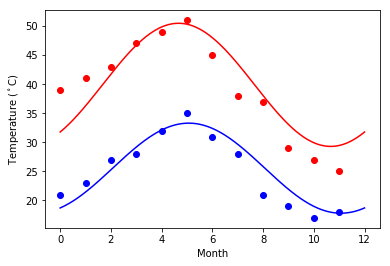

In [13]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))
res_max, cov_max = optimize.curve_fit(yearly_temps, months,
temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
temp_min, [-40, 20, 0])
days = np.linspace(0, 12, num=365)
plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.show()